HTRU2 is a data set which describes a sample of pulsar candidates collected during the
High Time Resolution Universe Survey (South).
The HTRU2 dataset contains data about pulsars. As pulsars rotate, they emit their own slightly distinct radio wave pattern 
that can be identified in this way by large telescopes.
However, other radio signals are also picked up in this way. 
It is essential to be able to identify which waves come from pulsars and which are noise. 
Indeed, almost all detections in practice are caused by radio frequency interference (RFI) and noise, 
making legitimate signals hard to find.

In [1]:
import itertools
import numpy as np
import pandas as pd
from plotnine import ggplot,aes,geom_bar
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model  import LogisticRegression
import sklearn.metrics as metrics
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef 
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [3]:
org_data = pd.read_csv("C:\\Users\\user\\Desktop\\Capstone\\HTRU_2\\HTRU_2.csv")

In [4]:
data = org_data.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   140.5625      17897 non-null  float64
 1   55.68378214   17897 non-null  float64
 2   -0.234571412  17897 non-null  float64
 3   -0.699648398  17897 non-null  float64
 4   3.199832776   17897 non-null  float64
 5   19.11042633   17897 non-null  float64
 6   7.975531794   17897 non-null  float64
 7   74.24222492   17897 non-null  float64
 8   0             17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Here our dataset have unnamed columns, so now we are going to name them.

There are eight features in the dataset to identify the pulsars. The first four features (Mean, Standard Deviation, Excess kurtosis and Skewness) are statistics of the pulse profile wave while the last four features are statistics about the DM-SNR (Dispersion Measure - Signal-to-Noise Ratio) curve obtained through the signal.

In [6]:
# Name the columns 
cols = [
    "Mean of the integrated profile",
    "Standard Deviation of the integrated profile",
    "Excess kurtosis of the integrated profile",
    "Skewness of the integrated profile",
    "Mean of the DM-SNR curve",
    "Standard Deviation of the DM-SNR curve",
    "Excess kurtosis of the DM-SNR curve",
    "Skewness of the DM-SNR curve",
    "Class",
]

data.columns = cols

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17897 non-null  float64
 1   Standard Deviation of the integrated profile  17897 non-null  float64
 2   Excess kurtosis of the integrated profile     17897 non-null  float64
 3   Skewness of the integrated profile            17897 non-null  float64
 4   Mean of the DM-SNR curve                      17897 non-null  float64
 5   Standard Deviation of the DM-SNR curve        17897 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17897 non-null  float64
 7   Skewness of the DM-SNR curve                  17897 non-null  float64
 8   Class                                         17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [8]:
print(f"The dataset has a shape (rows, cols) of {data.shape}!")

The dataset has a shape (rows, cols) of (17897, 9)!


In [9]:
data.head()

,Mean of the integrated profile,Standard Deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard Deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Class
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [10]:
data.describe()

,Mean of the integrated profile,Standard Deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard Deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Class
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.00000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419,0.09158
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270,0.28844
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.00000
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119,0.00000
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996,0.00000
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905,0.00000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.00000


Checking of Missing values.

In [11]:
missing_values_data=data.isna().sum()
missing_values_data

Mean of the integrated profile                  0
Standard Deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard Deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
Class                                           0
dtype: int64

In [12]:
data.duplicated().sum()

0

##### We don't have any missing values or duplicated values.

In [13]:
data.Class.value_counts()

0    16258
1     1639
Name: Class, dtype: int64

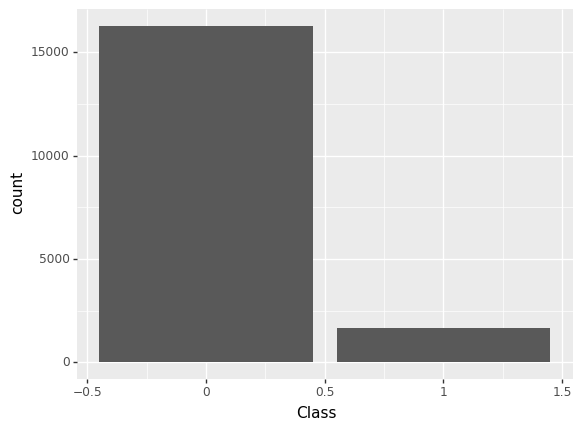

<ggplot: (134541765651)>

In [14]:
ggplot(data) + aes(x='Class') + geom_bar()

Here Class is our target variable and this the only categorical variable.

where 0: 1,639 are real pulsar wave patterns while, 

1: 16,258 are non-pulsar signals.

## Univariate Analysis

In [15]:
# Remove the target variable
y_data = data["Class"]
X_data = data.drop("Class", axis=1)

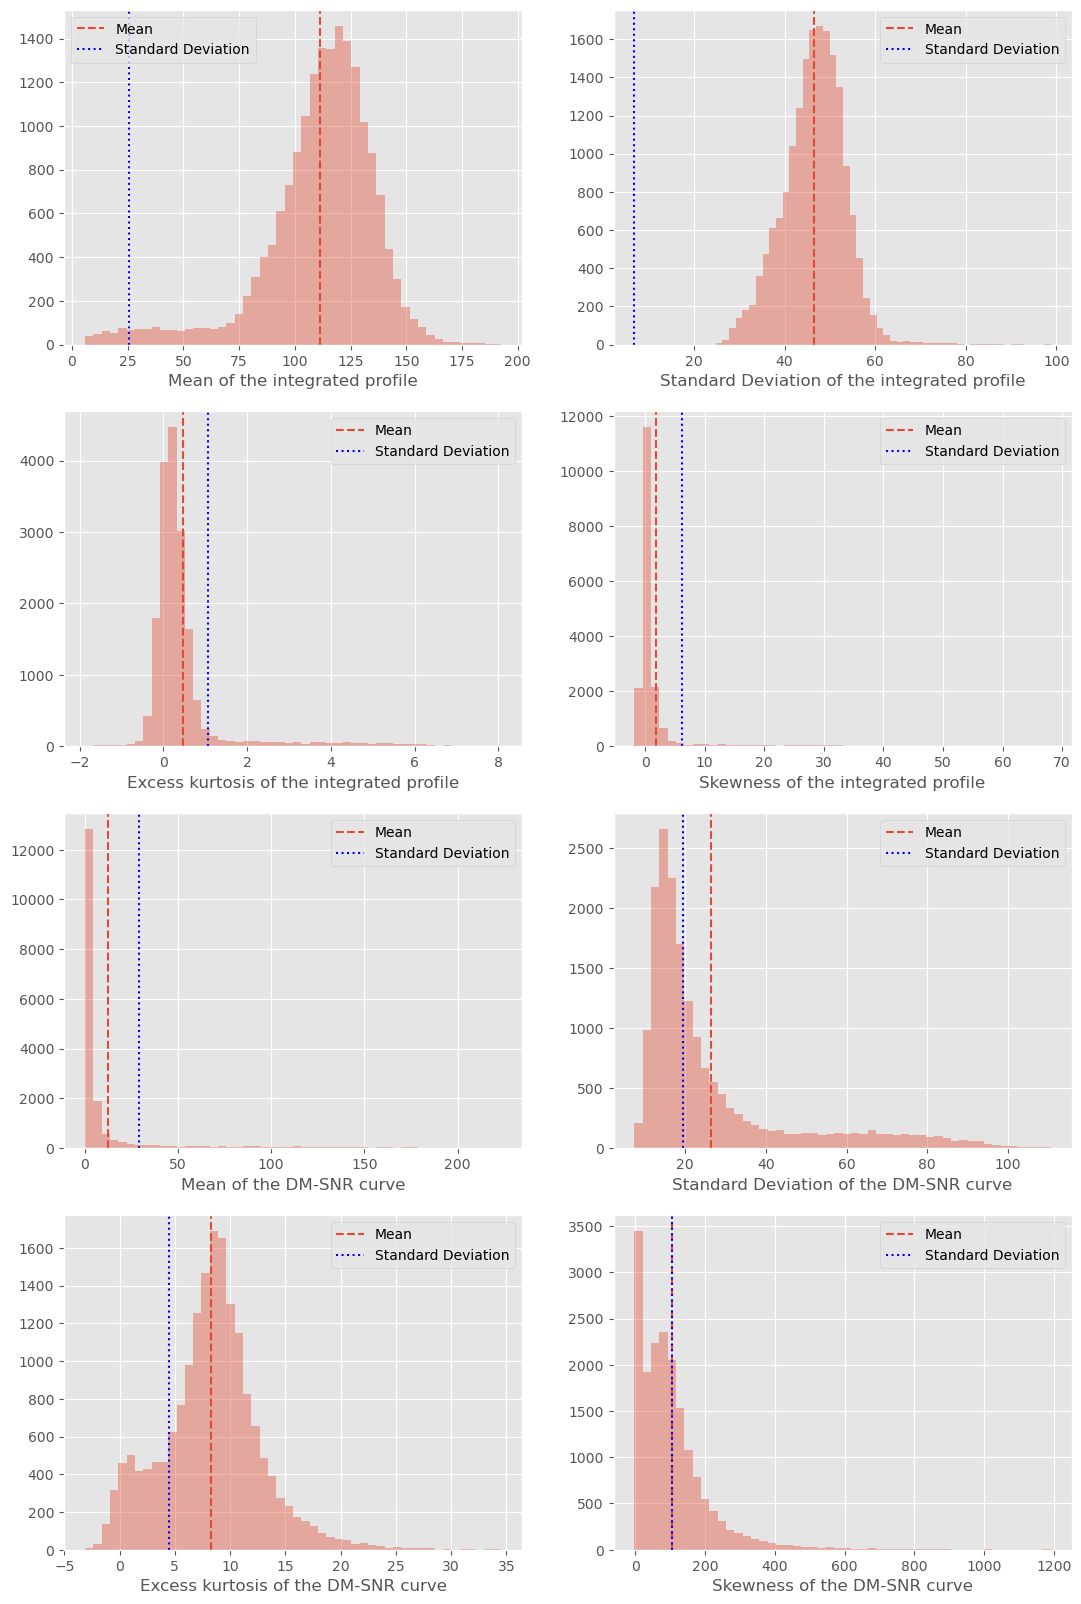

In [16]:
# Histograms to look at the distribution of data
plt.figure(figsize=(13, 20))
for i, col in enumerate(X_data.columns):
    plt.subplot(4, 2, i + 1)
    sns.distplot(X_data[col], kde=False)
    plt.axvline(X_data[col].mean(), linestyle="dashed", label="Mean")
    plt.axvline(
        X_data[col].std(), color="b", linestyle="dotted", label="Standard Deviation"
    )
    plt.legend(loc="best")

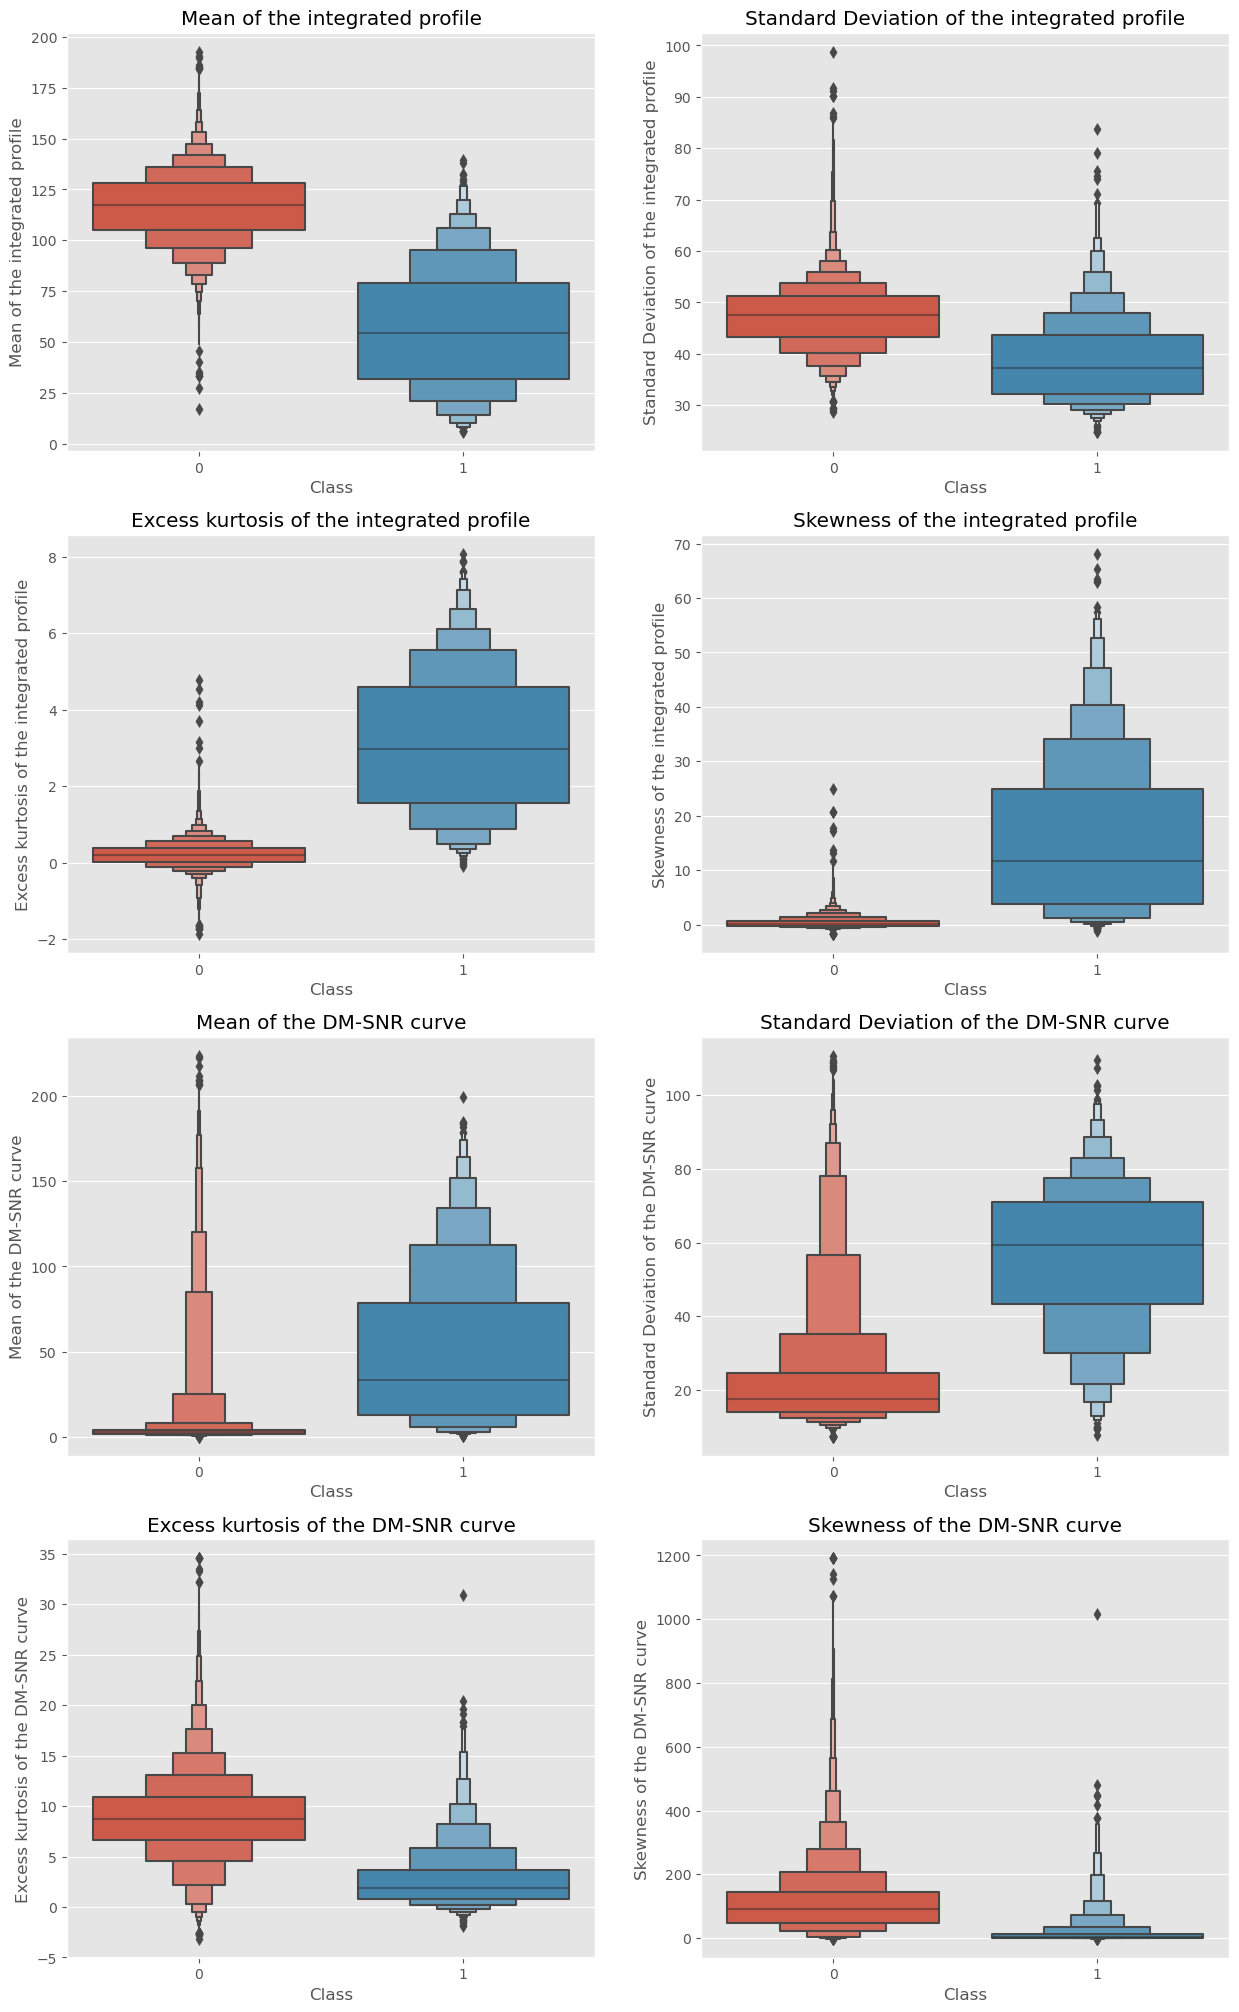

In [17]:
# Visual representation of the statistical summary of data
# Boxenplot shows a large number of quantiles
plt.figure(figsize=(15, 25))
for i, col in enumerate(X_data.columns):
    plt.subplot(4, 2, i + 1)
    plt.savefig(col + ".png")
    sns.boxenplot(x=y_data, y=X_data[col])
    plt.title(col)

<AxesSubplot:xlabel='Skewness of the DM-SNR curve'>

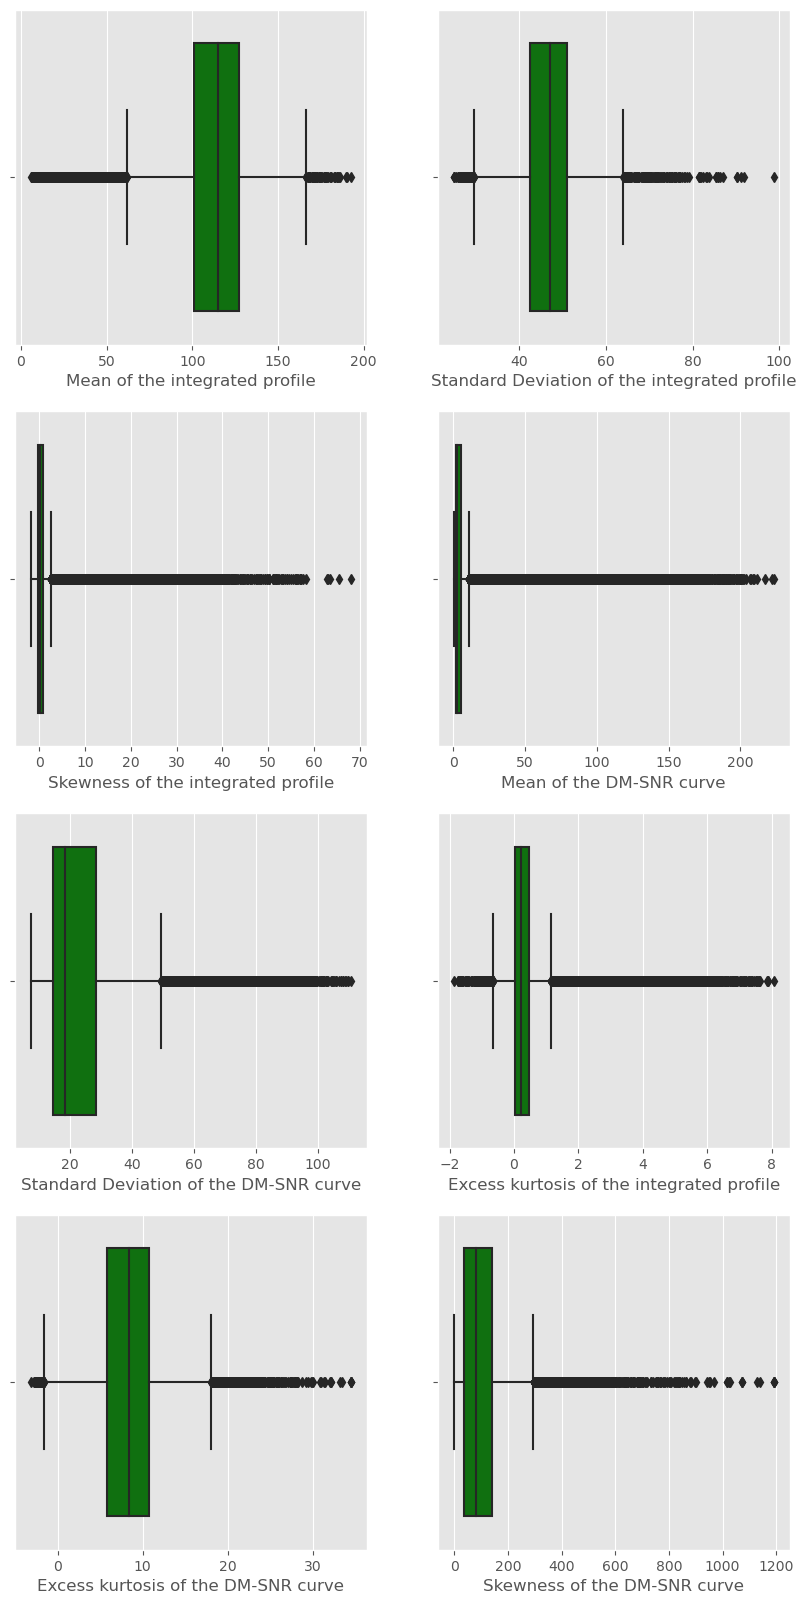

In [18]:
fig, axarr  = plt.subplots(4,2,figsize=(10,20))
sns.boxplot(x=data['Mean of the integrated profile'],ax=axarr[0,0], color = 'green')
sns.boxplot(x=data['Standard Deviation of the integrated profile'],ax=axarr[0,1], color = 'green')
sns.boxplot(x=data['Excess kurtosis of the integrated profile'],ax=axarr[2,1], color = 'green')
sns.boxplot(x=data['Skewness of the integrated profile'],ax=axarr[1,0], color='green')
sns.boxplot(x=data['Mean of the DM-SNR curve'],ax=axarr[1,1], color = 'green')
sns.boxplot(x=data['Standard Deviation of the DM-SNR curve'],ax=axarr[2,0], color = 'green')
sns.boxplot(x=data['Excess kurtosis of the DM-SNR curve'],ax=axarr[3,0], color = 'green')
sns.boxplot(x=data['Skewness of the DM-SNR curve'],ax=axarr[3,1], color = 'green')

In [19]:
data['Excess kurtosis of the integrated profile']=np.cbrt(data['Excess kurtosis of the integrated profile'])
data['Skewness of the integrated profile']=np.cbrt(data['Skewness of the integrated profile'])
data['Mean of the DM-SNR curve']=np.cbrt(data['Mean of the DM-SNR curve'])
data['Standard Deviation of the DM-SNR curve']=np.cbrt(data['Standard Deviation of the DM-SNR curve'])
data['Excess kurtosis of the DM-SNR curve']=np.cbrt(data['Excess kurtosis of the DM-SNR curve'])
data['Skewness of the DM-SNR curve']=np.cbrt(data['Skewness of the DM-SNR curve'])

<AxesSubplot:xlabel='Skewness of the DM-SNR curve'>

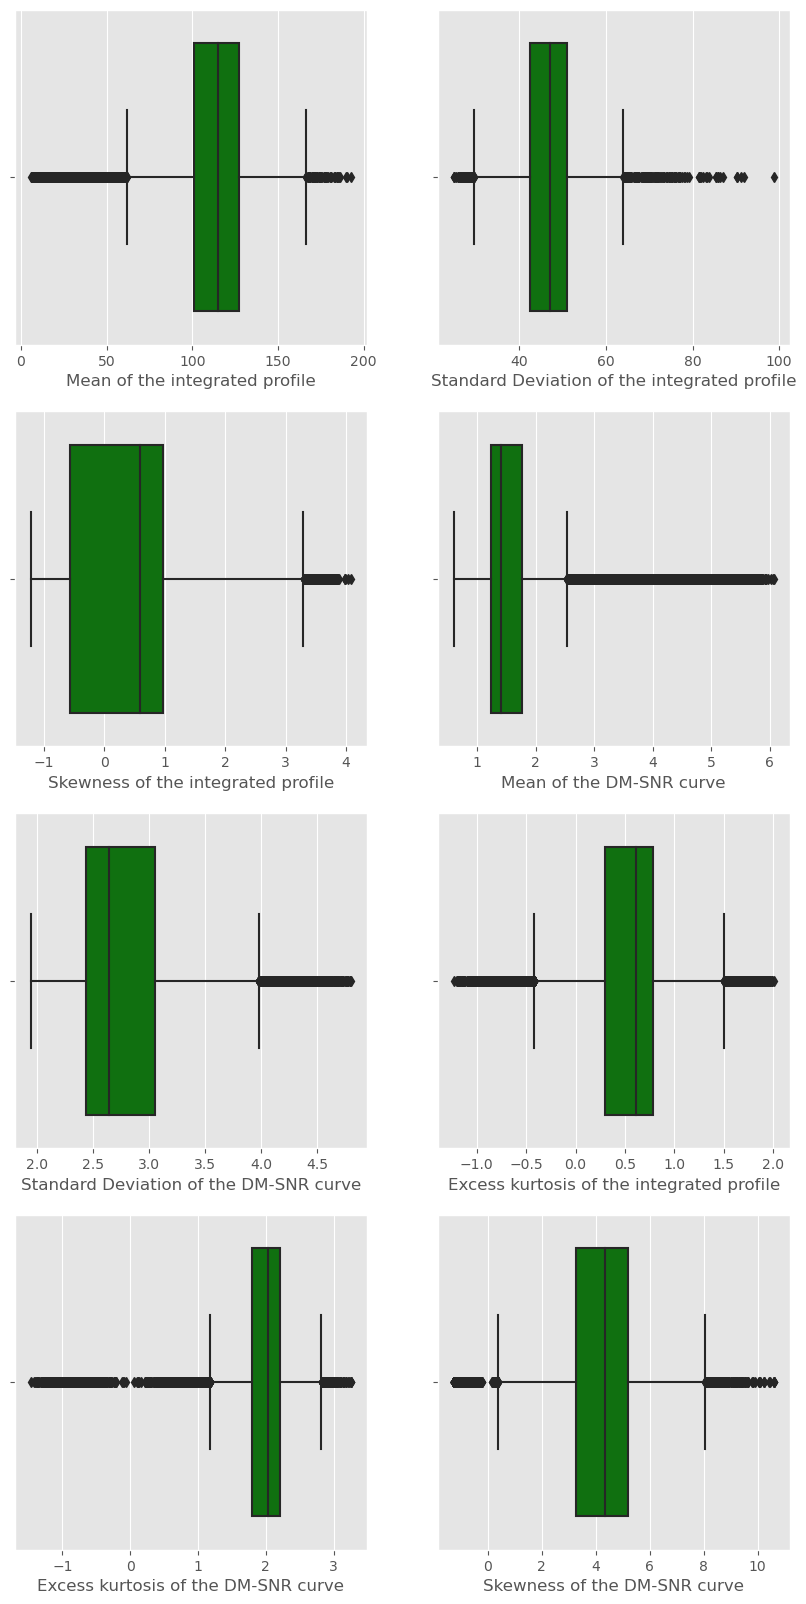

In [20]:
fig, axarr  = plt.subplots(4,2,figsize=(10,20))
sns.boxplot(x=data['Mean of the integrated profile'],ax=axarr[0,0], color = 'green')
sns.boxplot(x=data['Standard Deviation of the integrated profile'],ax=axarr[0,1], color = 'green')
sns.boxplot(x=data['Excess kurtosis of the integrated profile'],ax=axarr[2,1], color = 'green')
sns.boxplot(x=data['Skewness of the integrated profile'],ax=axarr[1,0], color='green')
sns.boxplot(x=data['Mean of the DM-SNR curve'],ax=axarr[1,1], color = 'green')
sns.boxplot(x=data['Standard Deviation of the DM-SNR curve'],ax=axarr[2,0], color = 'green')
sns.boxplot(x=data['Excess kurtosis of the DM-SNR curve'],ax=axarr[3,0], color = 'green')
sns.boxplot(x=data['Skewness of the DM-SNR curve'],ax=axarr[3,1], color = 'green')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17897 non-null  float64
 1   Standard Deviation of the integrated profile  17897 non-null  float64
 2   Excess kurtosis of the integrated profile     17897 non-null  float64
 3   Skewness of the integrated profile            17897 non-null  float64
 4   Mean of the DM-SNR curve                      17897 non-null  float64
 5   Standard Deviation of the DM-SNR curve        17897 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17897 non-null  float64
 7   Skewness of the DM-SNR curve                  17897 non-null  float64
 8   Class                                         17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [22]:
dfw = data['Mean of the integrated profile']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [23]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

60       27.765625
91       23.625000
109      35.156250
131      18.117188
144      44.867188
           ...    
17455    29.468750
17458    39.953125
17528    27.039062
17641    28.375000
17896    57.062500
Name: Mean of the integrated profile, Length: 1030, dtype: float64

In [24]:
data['Mean of the integrated profile'] = np.where(data['Mean of the integrated profile'] > dfw_upperend, dfw_upperend, data['Mean of the integrated profile'])
data['Mean of the integrated profile'] = np.where(data['Mean of the integrated profile'] < dfw_lowerend, dfw_lowerend, data['Mean of the integrated profile'])

Text(0.5, 1.0, 'Boxplot: Mean of the integrated profile')

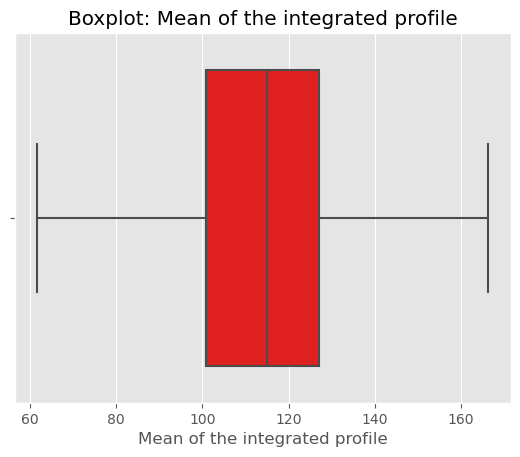

In [25]:
data['Mean of the integrated profile'] = data['Mean of the integrated profile'].astype('float64')
sns.boxplot(x=data['Mean of the integrated profile'], color = 'red', orient= 'h')
plt.title("Boxplot: Mean of the integrated profile")

In [26]:
dfw = data['Standard Deviation of the integrated profile']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [27]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

60       28.666042
131      29.297670
246      65.731565
282      25.771711
369      86.951396
           ...    
17101    64.912377
17300    68.305922
17469    74.791401
17641    27.649311
17896    85.797340
Name: Standard Deviation of the integrated profile, Length: 262, dtype: float64

In [28]:
data['Standard Deviation of the integrated profile'] = np.where(data['Standard Deviation of the integrated profile'] > dfw_upperend, dfw_upperend, data['Standard Deviation of the integrated profile'])
data['Standard Deviation of the integrated profile'] = np.where(data['Standard Deviation of the integrated profile'] < dfw_lowerend, dfw_lowerend, data['Standard Deviation of the integrated profile'])

Text(0.5, 1.0, 'Boxplot: Standard Deviation of the integrated profile')

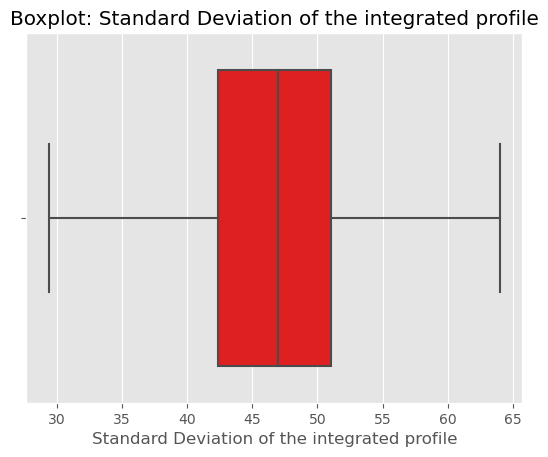

In [29]:
data['Standard Deviation of the integrated profile'] = data['Standard Deviation of the integrated profile'].astype('float64')
sns.boxplot(x=data['Standard Deviation of the integrated profile'], color = 'red', orient= 'h')
plt.title("Boxplot: Standard Deviation of the integrated profile")

In [30]:
dfw = data['Excess kurtosis of the integrated profile']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [31]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

6       -0.540980
9       -0.684224
10      -0.432781
11      -0.513377
14      -0.455487
           ...   
17821   -0.776791
17830   -0.718580
17852   -0.648269
17857   -0.525427
17892   -0.572709
Name: Excess kurtosis of the integrated profile, Length: 3314, dtype: float64

In [32]:
data['Excess kurtosis of the integrated profile'] = np.where(data['Excess kurtosis of the integrated profile'] > dfw_upperend, dfw_upperend, data['Excess kurtosis of the integrated profile'])
data['Excess kurtosis of the integrated profile'] = np.where(data['Excess kurtosis of the integrated profile'] < dfw_lowerend, dfw_lowerend, data['Excess kurtosis of the integrated profile'])

Text(0.5, 1.0, 'Boxplot: Excess kurtosis of the integrated profile')

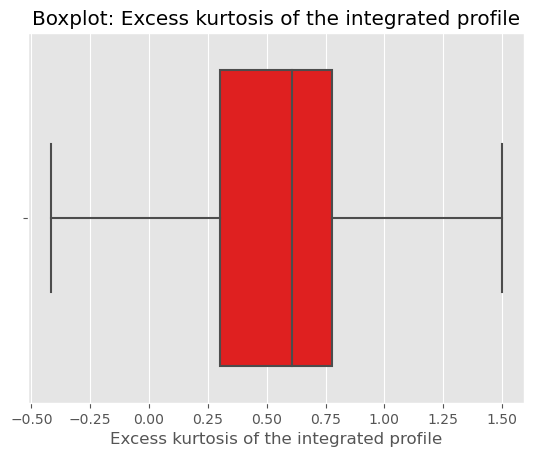

In [33]:
data['Excess kurtosis of the integrated profile'] = data['Excess kurtosis of the integrated profile'].astype('float64')
sns.boxplot(x=data['Excess kurtosis of the integrated profile'], color = 'red', orient= 'h')
plt.title("Boxplot: Excess kurtosis of the integrated profile")

In [34]:
dfw = data['Skewness of the integrated profile']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [35]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

60       3.344753
91       3.301535
131      3.546365
282      3.828433
400      3.756911
           ...   
14358    3.316049
14367    3.567765
14467    3.675964
17198    3.303498
17641    3.581595
Name: Skewness of the integrated profile, Length: 172, dtype: float64

In [36]:
data['Skewness of the integrated profile'] = np.where(data['Skewness of the integrated profile'] > dfw_upperend, dfw_upperend, data['Skewness of the integrated profile'])
data['Skewness of the integrated profile'] = np.where(data['Skewness of the integrated profile'] < dfw_lowerend, dfw_lowerend, data['Skewness of the integrated profile'])

Text(0.5, 1.0, 'Boxplot: Skewness of the integrated profile')

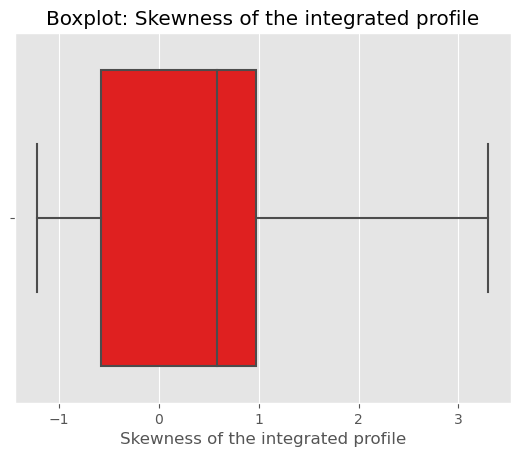

In [37]:
data['Skewness of the integrated profile'] = data['Skewness of the integrated profile'].astype('float64')
sns.boxplot(x=data['Skewness of the integrated profile'], color = 'red', orient= 'h')
plt.title("Boxplot: Skewness of the integrated profile")

In [38]:
dfw = data['Mean of the DM-SNR curve']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [39]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

18       3.020423
60       4.181492
61       2.749002
91       5.272464
93       3.903871
           ...   
17847    2.626046
17875    5.311446
17893    2.541169
17894    2.777654
17896    5.731761
Name: Mean of the DM-SNR curve, Length: 2416, dtype: float64

In [40]:
data['Mean of the DM-SNR curve'] = np.where(data['Mean of the DM-SNR curve'] > dfw_upperend, dfw_upperend, data['Mean of the DM-SNR curve'])
data['Mean of the DM-SNR curve'] = np.where(data['Mean of the DM-SNR curve'] < dfw_lowerend, dfw_lowerend, data['Mean of the DM-SNR curve'])

Text(0.5, 1.0, 'Boxplot: Mean of the DM-SNR curve')

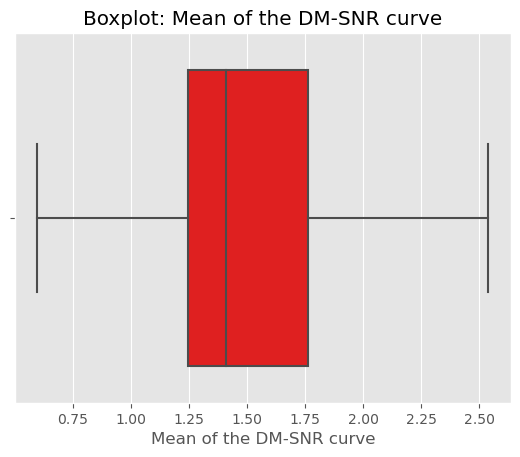

In [41]:
data['Mean of the DM-SNR curve'] = data['Mean of the DM-SNR curve'].astype('float64')
sns.boxplot(x=data['Mean of the DM-SNR curve'], color = 'red', orient= 'h')
plt.title("Boxplot: Mean of the DM-SNR curve")

In [42]:
dfw = data['Standard Deviation of the DM-SNR curve']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [43]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

91       4.351440
93       4.268187
99       4.022667
131      4.047798
133      4.402388
           ...   
17819    4.056153
17843    4.221967
17846    4.303770
17875    4.609290
17896    4.014790
Name: Standard Deviation of the DM-SNR curve, Length: 1567, dtype: float64

In [44]:
data['Standard Deviation of the DM-SNR curve'] = np.where(data['Standard Deviation of the DM-SNR curve'] > dfw_upperend, dfw_upperend, data['Standard Deviation of the DM-SNR curve'])
data['Standard Deviation of the DM-SNR curve'] = np.where(data['Standard Deviation of the DM-SNR curve'] < dfw_lowerend, dfw_lowerend, data['Standard Deviation of the DM-SNR curve'])

Text(0.5, 1.0, 'Boxplot: Standard Deviation of the DM-SNR curve')

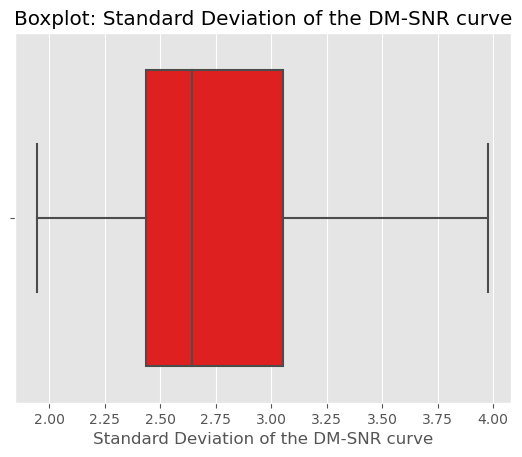

In [45]:
data['Standard Deviation of the DM-SNR curve'] = data['Standard Deviation of the DM-SNR curve'].astype('float64')
sns.boxplot(x=data['Standard Deviation of the DM-SNR curve'], color = 'red', orient= 'h')
plt.title("Boxplot: Standard Deviation of the DM-SNR curve")

In [46]:
dfw = data['Excess kurtosis of the DM-SNR curve']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [47]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

60       1.082422
91      -0.650218
93       0.896176
99       1.170955
131      1.133520
           ...   
17846    0.853218
17875   -0.886275
17888    2.881040
17890    3.016433
17896   -1.169004
Name: Excess kurtosis of the DM-SNR curve, Length: 1723, dtype: float64

In [48]:
data['Excess kurtosis of the DM-SNR curve'] = np.where(data['Excess kurtosis of the DM-SNR curve'] > dfw_upperend, dfw_upperend, data['Excess kurtosis of the DM-SNR curve'])
data['Excess kurtosis of the DM-SNR curve'] = np.where(data['Excess kurtosis of the DM-SNR curve'] < dfw_lowerend, dfw_lowerend, data['Excess kurtosis of the DM-SNR curve'])

Text(0.5, 1.0, 'Boxplot: Excess kurtosis of the DM-SNR curve')

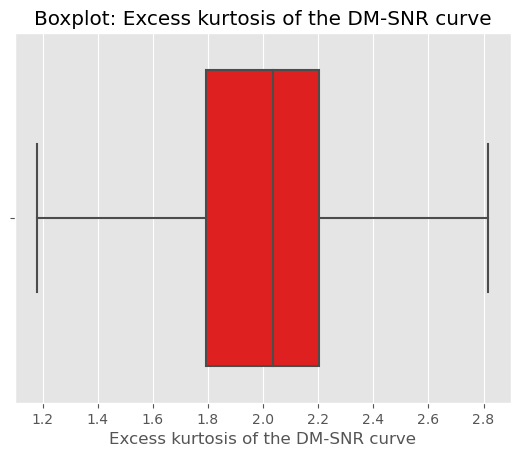

In [49]:
data['Excess kurtosis of the DM-SNR curve'] = data['Excess kurtosis of the DM-SNR curve'].astype('float64')
sns.boxplot(x=data['Excess kurtosis of the DM-SNR curve'], color = 'red', orient= 'h')
plt.title("Boxplot: Excess kurtosis of the DM-SNR curve")

In [50]:
dfw = data['Skewness of the DM-SNR curve']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [51]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

91      -1.039070
93      -1.057665
133     -1.012248
213      8.892811
226     -1.068327
           ...   
17846   -1.120892
17875   -1.080197
17887    8.251558
17888    8.707454
17890    9.400206
Name: Skewness of the DM-SNR curve, Length: 1338, dtype: float64

In [52]:
data['Skewness of the DM-SNR curve'] = np.where(data['Skewness of the DM-SNR curve'] > dfw_upperend, dfw_upperend, data['Skewness of the DM-SNR curve'])
data['Skewness of the DM-SNR curve'] = np.where(data['Skewness of the DM-SNR curve'] < dfw_lowerend, dfw_lowerend, data['Skewness of the DM-SNR curve'])

Text(0.5, 1.0, 'Boxplot: Skewness of the DM-SNR curve')

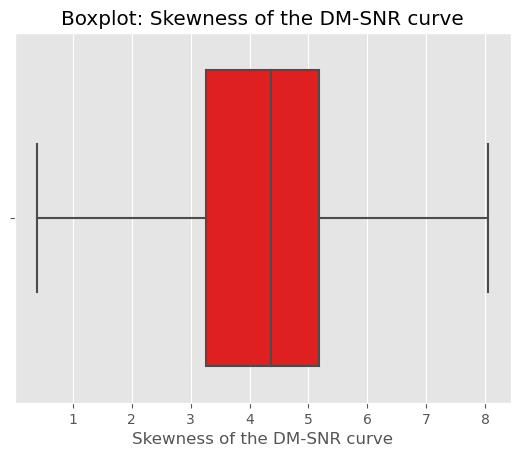

In [53]:
data['Skewness of the DM-SNR curve'] = data['Skewness of the DM-SNR curve'].astype('float64')
sns.boxplot(x=data['Skewness of the DM-SNR curve'], color = 'red', orient= 'h')
plt.title("Boxplot: Skewness of the DM-SNR curve")

## Bivariate analysis

#### Finding correlation between variables provides insights about the relationship between them

Text(0.5, 1.0, 'Correlation between Variables')

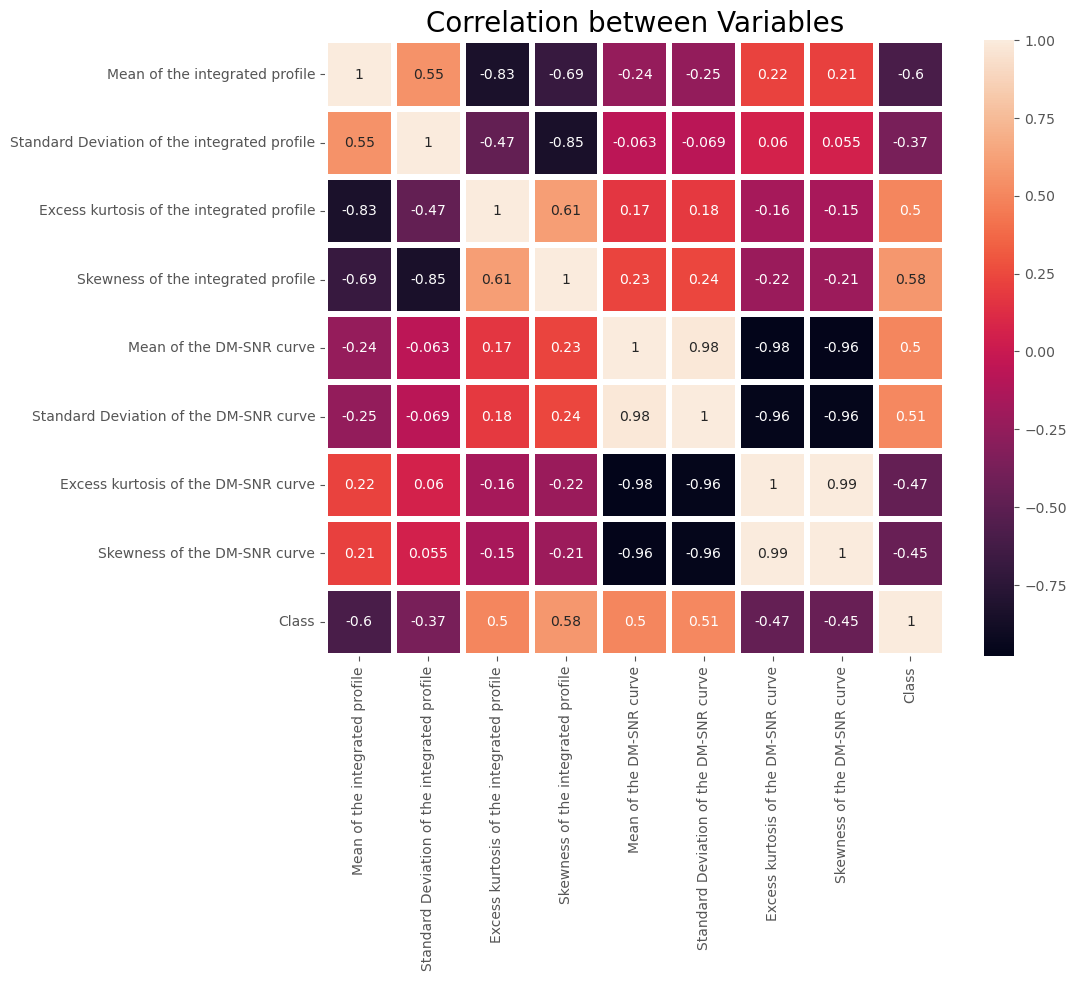

In [54]:
heat_map = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(heat_map, annot=True, linewidth=3)
plt.title("Correlation between Variables", fontsize=20)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17897 non-null  float64
 1   Standard Deviation of the integrated profile  17897 non-null  float64
 2   Excess kurtosis of the integrated profile     17897 non-null  float64
 3   Skewness of the integrated profile            17897 non-null  float64
 4   Mean of the DM-SNR curve                      17897 non-null  float64
 5   Standard Deviation of the DM-SNR curve        17897 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17897 non-null  float64
 7   Skewness of the DM-SNR curve                  17897 non-null  float64
 8   Class                                         17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [56]:
# Split the dataset into a train test and a test set
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=101, stratify=y_data)    

In [57]:
#Fit the StandardScaler to the train set
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_data.columns)

# Transform the test set
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_data.columns)

In [58]:
y_data.value_counts()

0    16258
1     1639
Name: Class, dtype: int64

The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary (two-class) classifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. The statistic is also known as the phi coefficient.

In [59]:
# Function to calculate and plot metrics
def print_metrics(y_test, y_pred):

    print("\033[1mMatthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))

    print("\nClassification report:\n", (classification_report(y_test, y_pred)))

    plt.figure(figsize=(6, 4))
    sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        fmt="d",
        linecolor="k",
        linewidths=3,
    )
    plt.title("Confusion Matrix", fontsize=20)

In [60]:
# Creating a Pandas DataFrame to retain models' performance
performance = pd.DataFrame(index=["MCC", "F1 Score"])

## Logistic Regression

Matthews Correlation Coefficient: 0.8615069119039047

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.94      0.81      0.87       328

    accuracy                           0.98      3580
   macro avg       0.96      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580



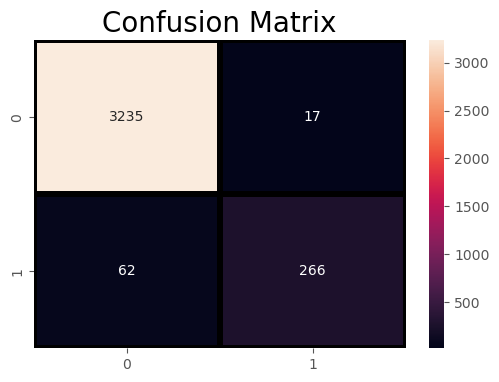

In [61]:
# Fitting the model and predicting
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

# A glance at the performance (different metrics)
print_metrics(y_test, log_reg_pred)

# Keep model's performance for later comparison
performance["Logistic Regression"] = (
    matthews_corrcoef(y_test, log_reg_pred),
    f1_score(y_test, log_reg_pred),
)

In [62]:
# roc curve
probs = log_reg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.9774266492664926


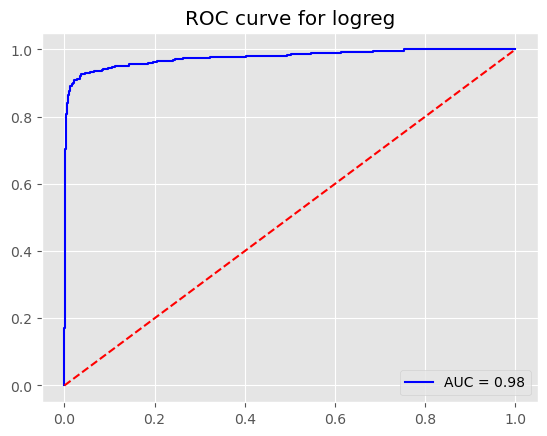

In [63]:
plt.title('ROC curve for logreg')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

## Decision Tree Classifier

Matthews Correlation Coefficient: 0.8182671288156453

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3252
           1       0.84      0.83      0.83       328

    accuracy                           0.97      3580
   macro avg       0.91      0.91      0.91      3580
weighted avg       0.97      0.97      0.97      3580



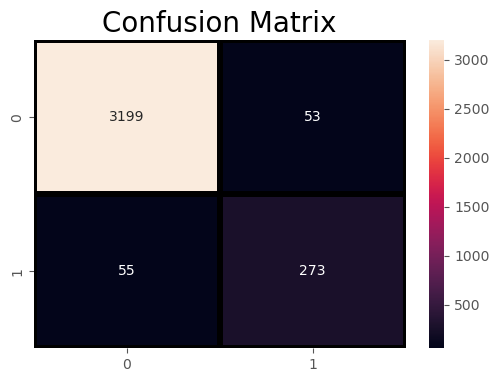

In [64]:
# Fitting the model and predicting
clf = DecisionTreeClassifier(criterion="entropy")
tree = clf.fit(X_train, y_train)
tree_pred = clf.predict(X_test)

print_metrics(y_test, tree_pred)

performance["Decision Tree"] = (
    matthews_corrcoef(y_test, tree_pred),
    f1_score(y_test, tree_pred),
)

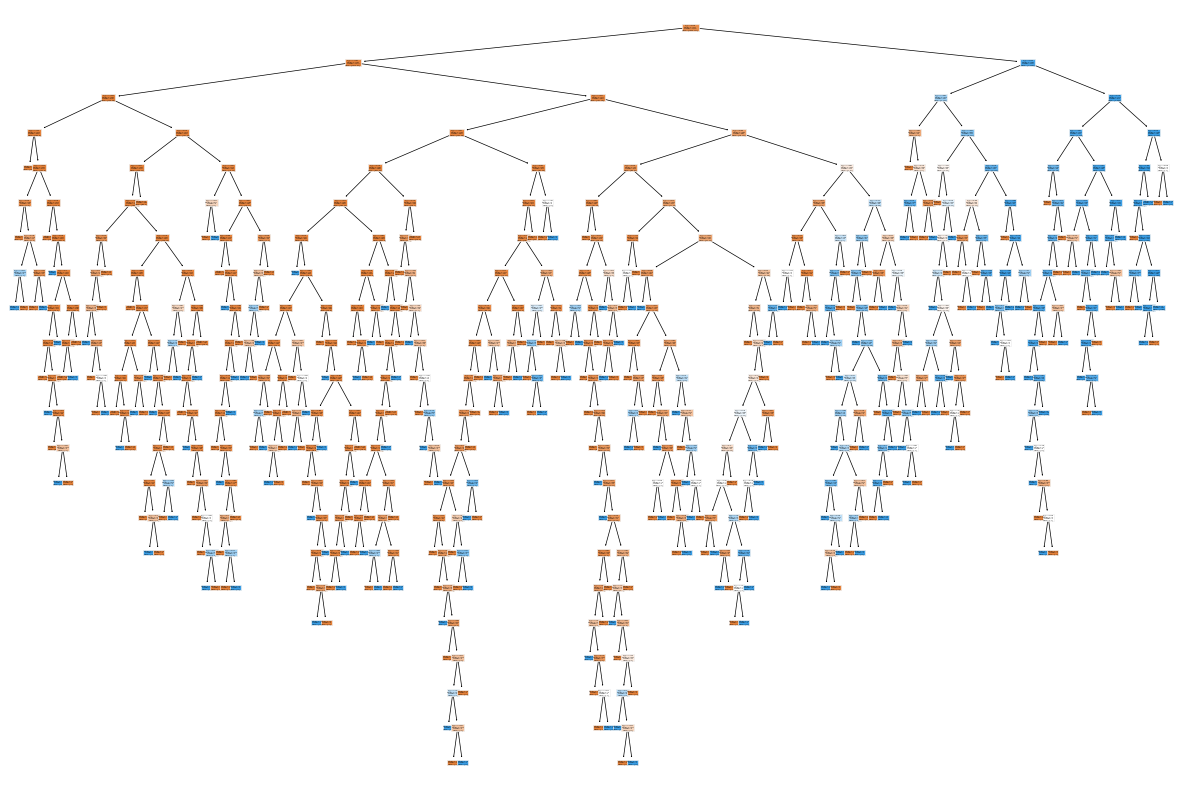

In [65]:
plt.figure(figsize=(15,10))
a = plot_tree(tree,filled=True)
plt.show()

In [66]:
tree.get_depth()

21

In [67]:
depth = [1,2,3,4,5,6,7,8]

accuracy_train,accuracy_test= [],[]

for i in depth:
    tree = DecisionTreeClassifier(max_depth= i, random_state=50)
    
    tree.fit(X_train, y_train)
    y_train_pred1=tree.predict(X_train)
    y_test_pred1=tree.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred1))
    accuracy_test.append(accuracy_score(y_test, y_test_pred1))

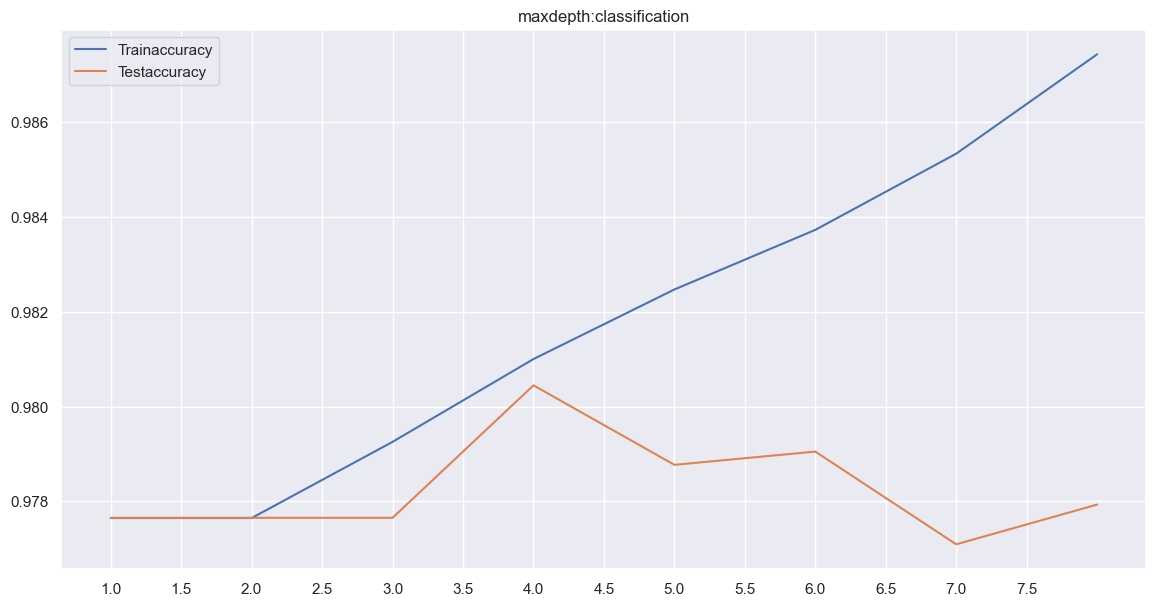

In [68]:
sns.set()
plt.figure(figsize = (14,7))
sns.lineplot(y=accuracy_train,x = depth, label = 'Trainaccuracy')
sns.lineplot(y=accuracy_test, x = depth, label = 'Testaccuracy')
plt.title("maxdepth:classification")
plt.xticks(ticks=np.arange(1,8,0.5))
plt.show()

## Navie Bayes

Matthews Correlation Coefficient: 0.7136524926380088

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      3252
           1       0.66      0.84      0.74       328

    accuracy                           0.94      3580
   macro avg       0.82      0.90      0.85      3580
weighted avg       0.95      0.94      0.95      3580



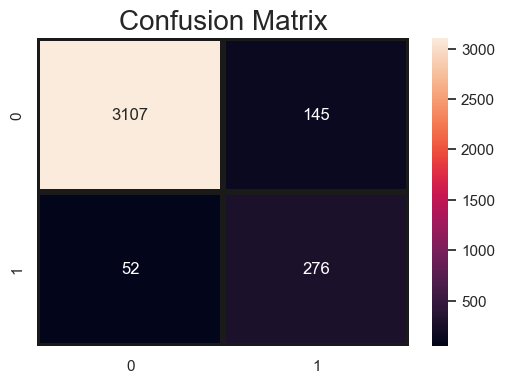

In [69]:
# Fitting the model and predicting
bayes = GaussianNB()
bayes.fit(X_train, y_train)
bayes_pred = bayes.predict(X_test)

# A glance at the performance (different metrics)
print_metrics(y_test, bayes_pred)


# Keep model's performance for later comparison
performance["Naïve Bayes"] = (
    matthews_corrcoef(y_test, bayes_pred),
    f1_score(y_test, bayes_pred),
)

## K- Nearest Neighbors

Matthews Correlation Coefficient: 0.8685651279947133

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.95      0.81      0.88       328

    accuracy                           0.98      3580
   macro avg       0.97      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580



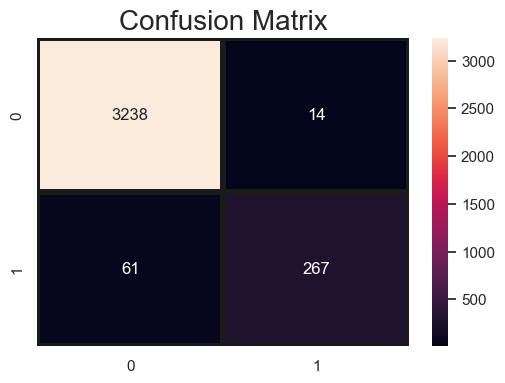

In [70]:
# Fitting the model and predicting
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# A glance at the performance (different metrics)
print_metrics(y_test, knn_pred)

# Keep model's performance for later comparison
performance["K-Nearest Neighbors"] = (
    matthews_corrcoef(y_test, knn_pred),
    f1_score(y_test, knn_pred),
    )

## Support Vector Classifier

Matthews Correlation Coefficient: 0.8613647298013272

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.94      0.81      0.87       328

    accuracy                           0.98      3580
   macro avg       0.96      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580



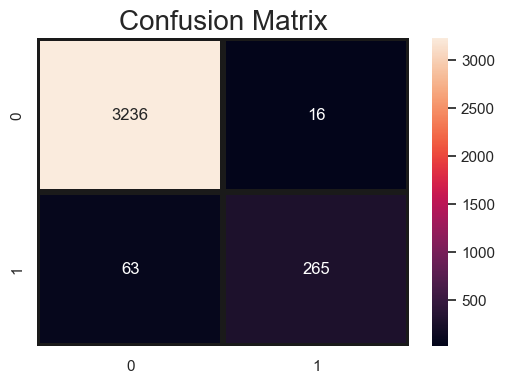

In [71]:
# Fitting the model and predicting
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# A glance at the performance (different metrics)
print_metrics(y_test, svc_pred)

# Keep model's performance for later comparison
performance["SVC"] = matthews_corrcoef(y_test, svc_pred), f1_score(y_test, svc_pred)

In [72]:
def performance_plot(performance):
    """Barplots of each model's performance on the Matthews Correlation Coefficient (MCC) and the F1 Score"""
    fig, ax = plt.subplots(figsize=(15, 7))
    w = 0.4
    i = np.arange(len(performance.columns))
    models = performance.columns

    bars_left = ax.bar(i - w / 2, performance.loc["MCC"] * 100, width=w, label="MCC")
    bars_right = ax.bar(
        i + w / 2, performance.loc["F1 Score"] * 100, width=w, label="F1 Score"
    )

    ax.grid(axis="y")
    ax.set_xticks(i)
    ax.set_xticklabels(models)
    ax.set_ylabel("Ratio (%)")
    ax.legend(loc="best")
    ax.set_ylim(0, 100)
    ax.set_title("Models performance")
    for bar in itertools.chain(bars_left, bars_right):
        height = bar.get_height()
        ax.annotate(
            "{:4.1f}".format(height),
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
        )

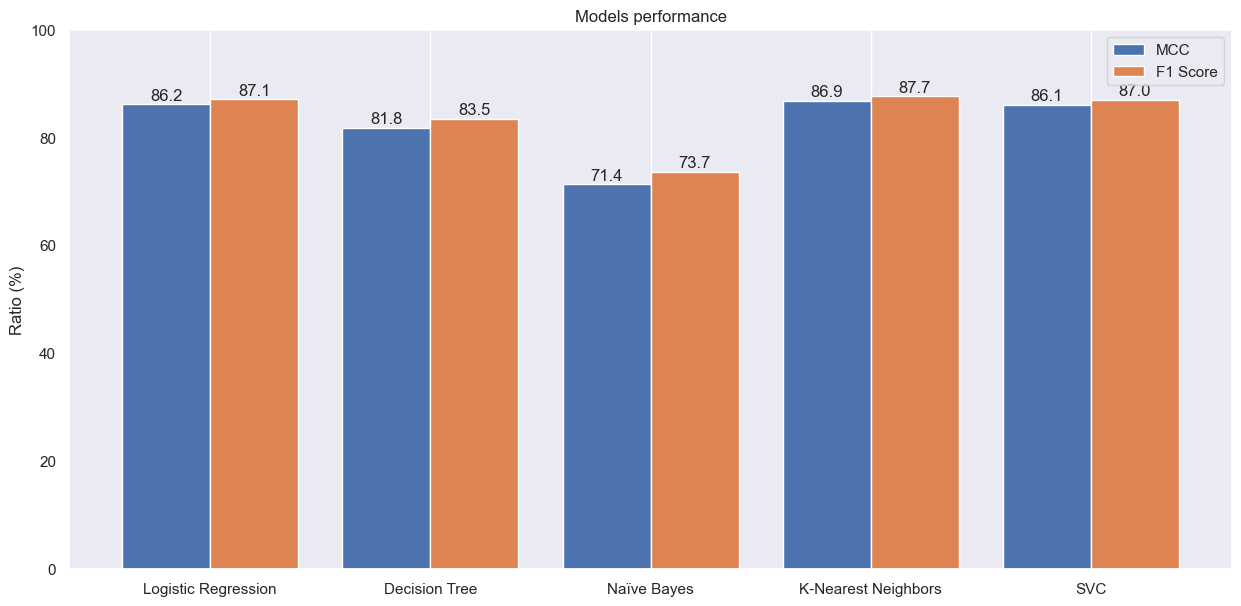

In [73]:
# Plotting each model's performances
performance_plot(performance)

## Ensemble learning

#### Random Forest

Matthews Correlation Coefficient: 0.8763633586628372

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.94      0.84      0.89       328

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



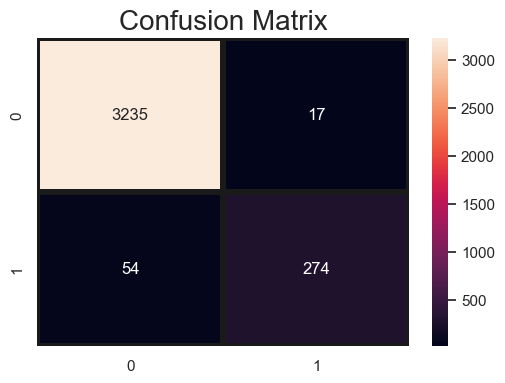

In [74]:
# Fitting the model and predicting
rand_forest = RandomForestClassifier(n_jobs=-1)
rand_forest.fit(X_train, y_train)
rand_forest_pred = rand_forest.predict(X_test)

# A glance at the performance (different metrics)
print_metrics(y_test, rand_forest_pred)

# Keep model's performance for later comparison
performance["Random Forest"] = (
    matthews_corrcoef(y_test, rand_forest_pred),
    f1_score(y_test, rand_forest_pred),
)

#### Boosting

Matthews Correlation Coefficient: 0.8616608205819012

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.94      0.81      0.87       328

    accuracy                           0.98      3580
   macro avg       0.96      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580



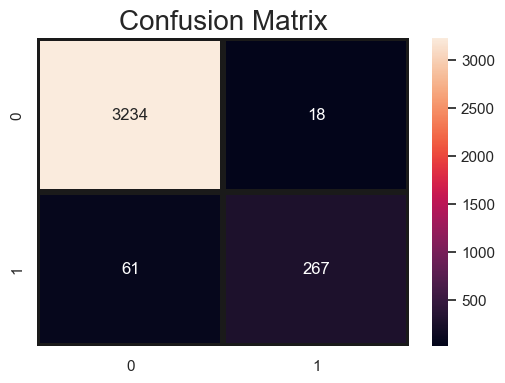

In [75]:
# Fitting the model and predicting
tree = DecisionTreeClassifier(criterion="entropy", max_depth=1)

adaboost = AdaBoostClassifier(
    base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=42
)
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_test)

# A glance at the performance (different metrics)
print_metrics(y_test, adaboost_pred)

# Keep model's performance for later comparison
performance["AdaBoost"] = (
    matthews_corrcoef(y_test, adaboost_pred),
    f1_score(y_test, adaboost_pred),
)

#### Stacking

Matthews Correlation Coefficient: 0.8688148495196855

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.94      0.82      0.88       328

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580



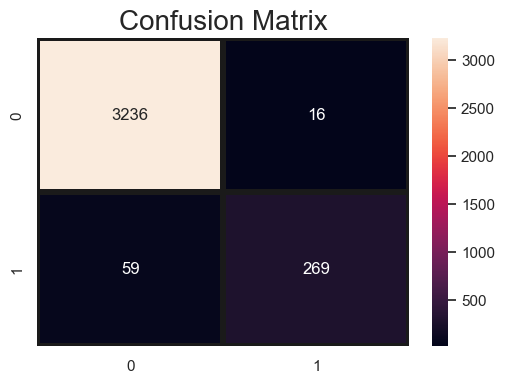

In [76]:
# Fitting the model and predicting
estimators = [
    ("knn", knn),
    ("tree", tree),
    ("logreg", log_reg),
    ("svc", svc),
    ("nb", bayes),
]
stack = StackingClassifier(estimators=estimators)
stack.fit(X_train, y_train)
stack_pred = stack.predict(X_test)

# A glance at the performance (different metrics)
print_metrics(y_test, stack_pred)

# Keep model's performance for later comparison
performance["Stacking"] = (
    matthews_corrcoef(y_test, stack_pred),
    f1_score(y_test, stack_pred),
)

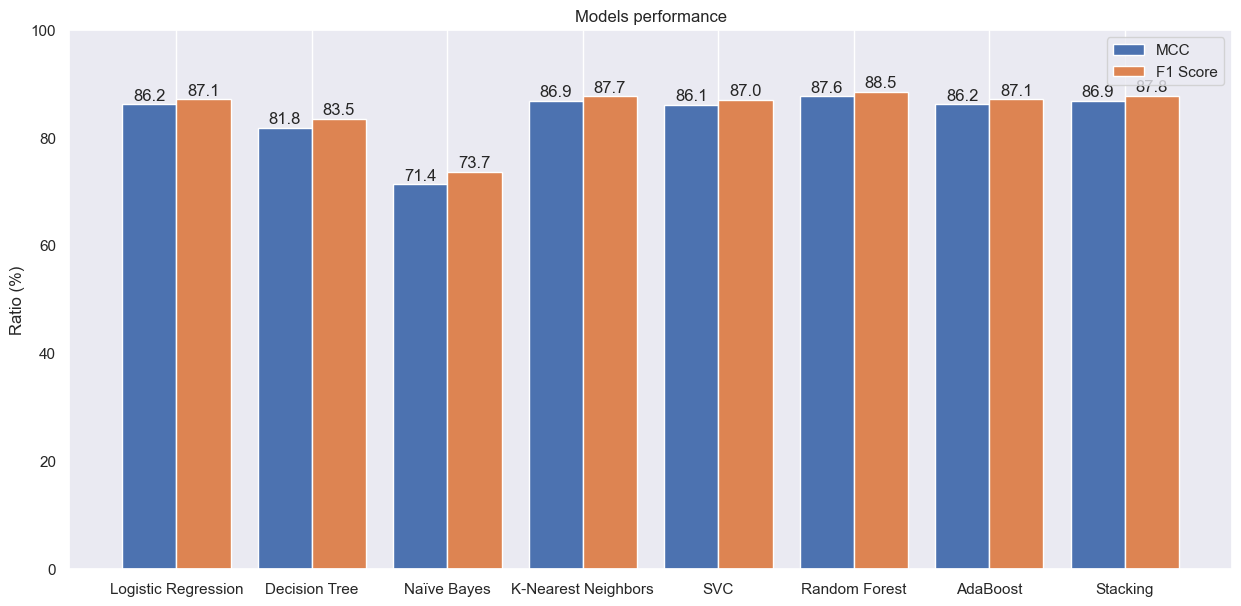

In [77]:
# Plotting each model's performances
performance_plot(performance)

##### The best estimator is Random Forest.
Matthew's Correlation Coefficient: 0.876, 
 F1 Score: 0.885